In [2]:
import numpy as np  # Import bibliotek
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Załadowanie danych MNIST
mnist = fetch_openml('mnist_784', version=1)

# Dodanie danych Iris
iris = load_iris()

In [ ]:
def euclidean_distance(a, b): # Funkcja licząca odległość Euklidesową między dwoma punktami
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b): # Funkcja licząca odległość Manhattan między dwoma punktami
    return np.sum(np.abs(a - b))

def cosine_distance(a, b): # Funkcja licząca odległość Cosine między dwoma punktami
    return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

def compute_distance_matrix(data, metric='euclidean'): # Funkcja licząca odległości między wszystkie punktami
    n_samples = len(data)
    distance_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            if metric == 'euclidean':
                distance = euclidean_distance(data[i], data[j])
            elif metric == 'manhattan':
                distance = manhattan_distance(data[i], data[j])
            elif metric == 'cosine':
                distance = cosine_distance(data[i], data[j])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance
    return distance_matrix

def find_closest_clusters(distance_matrix, clusters, linkage='single'): # Funkcja szukająca dwóch najbliższych punktów/klastrów
    min_distance = float('inf')
    closest_pair = None
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            if linkage == 'single':
                distances = [distance_matrix[p1, p2] for p1 in clusters[i] for p2 in clusters[j]]
                distance = min(distances)
            elif linkage == 'complete':
                distances = [distance_matrix[p1, p2] for p1 in clusters[i] for p2 in clusters[j]]
                distance = max(distances)
            elif linkage == 'average':
                distances = [distance_matrix[p1, p2] for p1 in clusters[i] for p2 in clusters[j]]
                distance = np.mean(distances)
            elif linkage == 'ward':
                distances = [distance_matrix[p1, p2] for p1 in clusters[i] for p2 in clusters[j]]
                distance = np.sum(distances)
            if distance < min_distance:
                min_distance = distance
                closest_pair = (i, j)
    return closest_pair

def agglomerative_clustering(data, num_clusters, metric='euclidean', linkage='single'): # Funkcja łącząca najbliższe punkty (grupy punktów) w co raz większe klastry
    clusters = [[i] for i in range(len(data))]
    distance_matrix = compute_distance_matrix(data, metric)
    while len(clusters) > num_clusters:
        i, j = find_closest_clusters(distance_matrix, clusters, linkage)
        clusters[i] = clusters[i] + clusters[j]
        del clusters[j]
    return clusters


def plot_clusters(data, clusters): # Funkcja tworząca wykres z punktami podzielonymi kolorami na klastry
    plt.figure(figsize=(4, 4))
    for idx, cluster in enumerate(clusters):
        cluster_points = data[cluster]
        plt.scatter(cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {idx + 1}')
    plt.title('Agglomerative Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def get_cluster_labels(clusters, n_samples):
    labels = np.zeros(n_samples, dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
    return labels

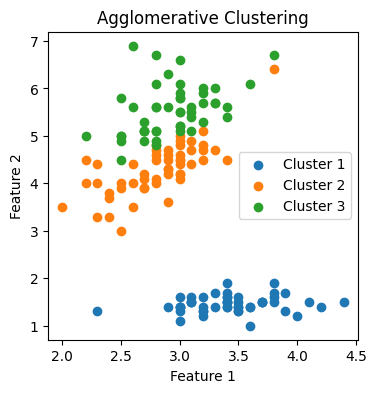

Rand Score: 0.8856970310281228
Silhouette Score: 0.4879361798207864
Davies-Bouldin Score: 0.8130063336519662


In [ ]:
data = iris.data
true_labels = iris.target

num_clusters = 3 # Liczba klastrów
metric = 'cosine'  # Można zmienić na 'euclidean', 'manhattan' lub 'cosine'
linkage = 'ward'  # Można zmienić na 'ward', 'average', 'complete' lub 'single'

clusters = agglomerative_clustering(data, num_clusters, metric, linkage) # Podział na klastry za pomocą Agglomerative Clustering

plot_clusters(data, clusters) # Podgląd podziału na klastry

predicted_labels = get_cluster_labels(clusters, len(data))

rand_score = adjusted_rand_score(true_labels, predicted_labels)
silhouette_avg = silhouette_score(data, predicted_labels)
db_score = davies_bouldin_score(data, predicted_labels)

print(f'Rand Score: {rand_score}') # Wartości bliskie 1 wskazują na idealny podział na klastry
print(f'Silhouette Score: {silhouette_avg}') # Wartości bliskie 1 wskazują na dobrze zdefiniowane klastry
print(f'Davies-Bouldin Score: {db_score}') # Im mniej tym lepiej

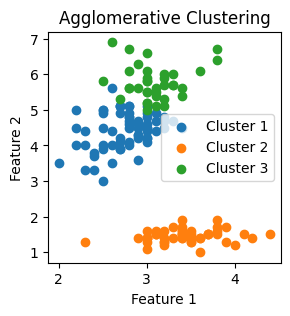

Rand Score for Agglomerative Clustering: 0.7311985567707746
Silhouette Score for Agglomerative Clustering: 0.5543236611296419
Davies-Bouldin Score for Agglomerative Clustering: 0.6562564540642021


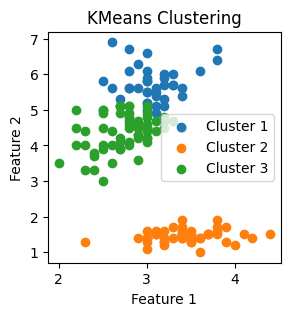

Rand Score for KMeans Clustering: 0.7163421126838476
Silhouette Score for KMeans Clustering: 0.551191604619592
Davies-Bouldin Score for KMeans Clustering: 0.6660385791628493


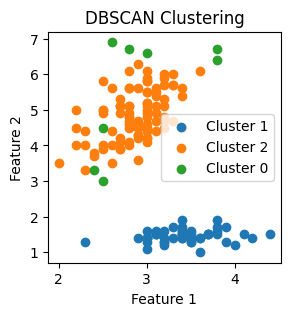

Rand Score for DBSCAN Clustering: 0.5513549682167949
Silhouette Score for DBSCAN Clustering: 0.5385919451236434
Davies-Bouldin Score for DBSCAN Clustering: 2.6316873662276357


In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering  # Import trzech algorytmów klasteryzacji

# Funkcja tworząca wykres
def plot_clusters2(data, labels, title):
    plt.figure(figsize=(3, 3))
    unique_labels = set(labels)
    for label in unique_labels:
        color = None
        label_name = f'Cluster {label + 1}'
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 1], cluster_points[:, 2], label=label_name, color=color)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Klasteryzacja AgglomerativeClustering
ac_model = AgglomerativeClustering(n_clusters=num_clusters)
ac_labels = ac_model.fit_predict(data)
plot_clusters2(data, ac_labels, "Agglomerative Clustering")

# Obliczenie metryk oceny klasteryzacji
print("Rand Score for Agglomerative Clustering:", adjusted_rand_score(true_labels, ac_labels))
print("Silhouette Score for Agglomerative Clustering:", silhouette_score(data, ac_labels))
print("Davies-Bouldin Score for Agglomerative Clustering:", davies_bouldin_score(data, ac_labels))

# Klasteryzacja KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
plot_clusters2(data, kmeans_labels, "KMeans Clustering")

# Obliczenie metryk oceny klasteryzacji
print("Rand Score for KMeans Clustering:", adjusted_rand_score(true_labels, kmeans_labels))
print("Silhouette Score for KMeans Clustering:", silhouette_score(data, kmeans_labels))
print("Davies-Bouldin Score for KMeans Clustering:", davies_bouldin_score(data, kmeans_labels))

# Klasteryzacja DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan_labels = dbscan.fit_predict(data)
plot_clusters2(data, dbscan_labels, "DBSCAN Clustering")

# Obliczenie metryk oceny klasteryzacji
print("Rand Score for DBSCAN Clustering:", adjusted_rand_score(true_labels, dbscan_labels))
print("Silhouette Score for DBSCAN Clustering:", silhouette_score(data, dbscan_labels))
print("Davies-Bouldin Score for DBSCAN Clustering:", davies_bouldin_score(data, dbscan_labels))

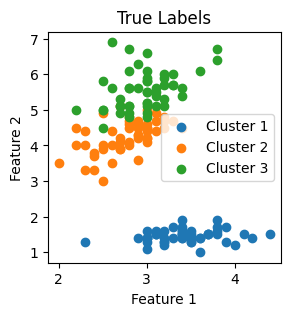

Rand Score: 1.0
Silhouette Score: 0.5556956873673654
Davies-Bouldin Score: 0.6221217760637104


In [ ]:
# Wykres podziału w iris.target

plot_clusters2(data, true_labels, "True Labels")

# Obliczenie metryk oceny klasteryzacji
print("Rand Score:", adjusted_rand_score(true_labels, true_labels))
print("Silhouette Score:", silhouette_score(data, true_labels))
print("Davies-Bouldin Score:", davies_bouldin_score(data, true_labels))

In [69]:
# Załadowanie danych MNIST
data2 = mnist.data.to_numpy() / 255.0  # Normalizacja i konwersja na NumPy
true_labels = mnist.target.astype(int)

# Wybieramy tylko pierwsze 200 próbek
data2 = data2[:1000]
true_labels = true_labels[:1000]

# PCA
pca = PCA(n_components=2)
data2 = pca.fit_transform(data2)

In [70]:
# Klasteryzacja aglomeracyjna
num_clusters = 10  # Wybieramy 10 klastrów
metric = 'euclidean'  # Można zmienić na 'euclidean', 'manhattan' lub 'cosine'
linkage = 'ward'  # Można zmienić na 'ward', 'average', 'complete' lub 'single'
clusters = agglomerative_clustering(data2, num_clusters, metric=metric, linkage=linkage)

# Pobranie etykiet klastrów
labels = get_cluster_labels(clusters, len(data2))

# Obliczenie ARI
ari_score = adjusted_rand_score(true_labels, labels)

# Wyświetlenie wyniku ARI
print("Adjusted Rand Index (ARI):", ari_score)

Adjusted Rand Index (ARI): 0.3409137918974334
